In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
# Define the URL of the website from which you want to extract data
url = "https://www.numbeo.com/quality-of-life/rankings.jsp"

# Use the requests library to make an HTTP GET request to the specified URL and retrieve the page's HTML content
source = requests.get(url).text
# Create a BeautifulSoup object to parse the HTML content using the 'lxml' parser
soup = BeautifulSoup(source, 'lxml')

print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <script defer="" src="https://www.numbeo.com/common/numbeo_standard.js">
  </script>
  <link href="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.10.3/themes/redmond/jquery-ui.min.css" rel="Stylesheet"/>
  <link href="https://www.numbeo.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <script defer="" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/1.10.2/jquery.min.js">
  </script>
  <script defer="" src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.10.3/jquery-ui.min.js">
  </script>
  <script src="https://www.gstatic.com/charts/loader.js">
  </script>
  <link href="https://www.numbeo.com/images/apple-touch-icon.png" rel="apple-touch-icon"/>
  <script>
   if (typeof whenDocReady === "function") {
    // already declared, do nothing
  } else {
    function whenDocReady(fn) {
      // see if DOM is already available
      if (document.readyState ==

In [4]:
#finding the table in the website
table=soup.find("table", class_="stripe row-border order-column compact")
print(table.prettify())

<table class="stripe row-border order-column compact" id="t2">
 <thead>
  <tr>
   <th>
    <div style="font-size: 80%; vertical-align: middle;">
     Rank
    </div>
   </th>
   <th>
    <div style="font-size: 95%;">
     City
    </div>
   </th>
   <th>
    <div style="font-size: 90%;">
     Quality of Life Index
    </div>
   </th>
   <th>
    <div style="font-size: 90%;">
     Purchasing Power Index
    </div>
   </th>
   <th>
    <div style="font-size: 90%;">
     Safety Index
    </div>
   </th>
   <th>
    <div style="font-size: 90%;">
     Health Care Index
    </div>
   </th>
   <th>
    <div style="font-size: 90%;">
     Cost of Living Index
    </div>
   </th>
   <th>
    <div style="font-size: 90%;">
     Property Price to Income Ratio
    </div>
   </th>
   <th>
    <div style="font-size: 90%;">
     Traffic Commute Time Index
    </div>
   </th>
   <th>
    <div style="font-size: 90%;">
     Pollution Index
    </div>
   </th>
   <th>
    <div style="font-size: 90%;">
    

In [5]:
title=soup.find("thead")
if title:
  head = title.find("tr")
  header = [th.text.strip() for th in head.find_all("th")]
header

['Rank',
 'City',
 'Quality of Life Index',
 'Purchasing Power Index',
 'Safety Index',
 'Health Care Index',
 'Cost of Living Index',
 'Property Price to Income Ratio',
 'Traffic Commute Time Index',
 'Pollution Index',
 'Climate Index']

In [6]:
tbody = table.find("tbody")
data = []

if tbody:
    # Find all 'tr' (table row) elements within the 'tbody'
    rows = tbody.find_all("tr")

    # Loop through each 'tr' element to extract row data
    for row in rows:
        # Extract text from each 'td' (table data) element within the row and strip any leading/trailing whitespace
        row_data = [td.text.strip() for td in row.find_all("td")]

        # Append the extracted row data to the 'data' list
        data.append(row_data)

# Create a Pandas DataFrame using the extracted data and the previously defined 'header' (table header)
quality = pd.DataFrame(data, columns=header)
# Print the resulting DataFrame
quality

,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,,"The Hague (Den Haag), Netherlands",215.7,123.7,79.3,79.9,61.6,5.6,22.0,19.2,90.6
1,,"Rotterdam, Netherlands",202.5,115.0,71.1,79.7,64.7,5.5,23.8,24.6,87.9
2,,"Luxembourg, Luxembourg",200.5,124.2,72.0,79.0,71.6,11.0,25.8,19.9,82.6
3,,"Vienna, Austria",197.7,104.0,72.6,78.9,65.0,10.5,22.5,16.1,81.8
4,,"Valencia, Spain",196.3,94.4,70.1,79.8,49.4,4.3,22.3,29.1,93.8
...,...,...,...,...,...,...,...,...,...,...,...
190,,"Beirut, Lebanon",59.4,12.3,53.3,64.2,54.0,41.8,39.5,93.7,94.7
191,,"Tehran, Iran",58.8,18.1,44.0,52.6,30.8,32.0,52.4,80.8,71.0
192,,"Dhaka, Bangladesh",57.8,26.0,36.8,39.9,28.4,15.0,61.0,93.6,71.3
193,,"Lagos, Nigeria",48.3,11.5,32.3,46.7,26.1,15.4,67.4,89.4,60.8


In [7]:
quality.head()

,Rank,City,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index
0,,"The Hague (Den Haag), Netherlands",215.7,123.7,79.3,79.9,61.6,5.6,22.0,19.2,90.6
1,,"Rotterdam, Netherlands",202.5,115.0,71.1,79.7,64.7,5.5,23.8,24.6,87.9
2,,"Luxembourg, Luxembourg",200.5,124.2,72.0,79.0,71.6,11.0,25.8,19.9,82.6
3,,"Vienna, Austria",197.7,104.0,72.6,78.9,65.0,10.5,22.5,16.1,81.8
4,,"Valencia, Spain",196.3,94.4,70.1,79.8,49.4,4.3,22.3,29.1,93.8


In [58]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            195 non-null    object 
 1   City                            195 non-null    object 
 2   Quality of Life Index           195 non-null    float64
 3   Purchasing Power Index          195 non-null    float64
 4   Safety Index                    195 non-null    float64
 5   Health Care Index               195 non-null    float64
 6   Cost of Living Index            195 non-null    float64
 7   Property Price to Income Ratio  195 non-null    float64
 8   Traffic Commute Time Index      195 non-null    float64
 9   Pollution Index                 195 non-null    float64
 10  Climate Index                   195 non-null    object 
dtypes: float64(8), object(3)
memory usage: 16.9+ KB


In [135]:
#converting objects into floats
convert_dict = {'Quality of Life Index': float,
                'Purchasing Power Index': float,
                'Safety Index': float,
                'Health Care Index': float,
                'Cost of Living Index': float,
                'Property Price to Income Ratio': float,
                'Traffic Commute Time Index': float,
                'Pollution Index': float
            
                }
quality = quality.astype(convert_dict)


In [59]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            195 non-null    object 
 1   City                            195 non-null    object 
 2   Quality of Life Index           195 non-null    float64
 3   Purchasing Power Index          195 non-null    float64
 4   Safety Index                    195 non-null    float64
 5   Health Care Index               195 non-null    float64
 6   Cost of Living Index            195 non-null    float64
 7   Property Price to Income Ratio  195 non-null    float64
 8   Traffic Commute Time Index      195 non-null    float64
 9   Pollution Index                 195 non-null    float64
 10  Climate Index                   195 non-null    object 
dtypes: float64(8), object(3)
memory usage: 16.9+ KB


In [136]:
print(quality["Quality of Life Index"].mean()) # finding mean 

137.65589743589743


In [20]:
print(quality["Quality of Life Index"].max()) #finding maximum value

215.7


In [21]:
print(quality["Quality of Life Index"].min()) #finding minimum value

41.1


In [137]:
print(quality["Quality of Life Index"].std()) #finding standard deviation

34.473822484465764


In [23]:
print(quality["Quality of Life Index"].var()) #finding variance

1188.4444366904572


In [138]:
print(quality["Quality of Life Index"].value_counts()) #finding the times the values are repeated 

164.6    3
161.7    3
140.4    2
135.9    2
149.1    2
        ..
157.0    1
156.5    1
156.0    1
155.9    1
41.1     1
Name: Quality of Life Index, Length: 180, dtype: int64


In [25]:
print(quality["Quality of Life Index"].unique()) #finding unique values that don't repeat

[215.7 202.5 200.5 197.7 196.3 194.8 194.4 185.1 185.  182.8 181.4 178.7
 178.4 178.1 177.7 177.  176.8 176.1 175.2 174.9 174.8 174.2 173.3 173.2
 173.  172.7 171.3 170.8 170.6 169.5 168.1 167.7 167.  166.7 166.5 165.7
 165.2 165.1 164.8 164.6 164.5 164.4 164.3 164.2 164.1 164.  163.8 163.7
 163.4 163.3 163.2 163.  162.9 162.6 162.5 162.4 161.7 161.6 161.2 160.
 159.9 159.5 158.6 158.5 157.  156.5 156.  155.9 155.1 154.9 154.8 153.3
 153.1 152.1 151.4 151.1 150.8 150.4 149.7 149.5 149.1 148.3 148.1 146.1
 145.9 145.8 145.7 143.6 141.5 140.5 140.4 139.8 139.6 139.5 138.7 138.4
 137.9 137.4 137.  136.7 136.4 136.  135.9 135.4 134.5 134.3 134.2 132.3
 131.5 130.5 130.2 127.8 127.7 127.1 126.5 126.3 125.1 124.2 122.6 121.6
 121.5 119.5 117.8 117.7 116.9 116.8 116.4 116.2 115.8 115.4 114.7 114.1
 113.7 113.6 111.6 111.5 111.1 110.  109.6 108.9 107.  105.9 105.5 104.4
 104.3 104.2 103.9 103.3 102.3 100.7 100.3  99.9  97.5  96.2  96.   95.9
  95.3  94.3  89.8  86.9  85.4  84.5  84.2  83.   82

In [26]:
print(quality["Quality of Life Index"].nunique())

180


In [63]:
print(quality["Quality of Life Index"].isnull().sum())

0


In [64]:
print(quality["Purchasing Power Index"].mean())

70.55435897435898


In [72]:
print(quality["Purchasing Power Index"].max())

147.0


In [73]:
print(quality["Purchasing Power Index"].min())

9.7


In [74]:
print(quality["Purchasing Power Index"].std())

32.7642299135694


In [75]:
print(quality["Purchasing Power Index"].var())

1073.4947618292358


In [76]:
print(quality["Purchasing Power Index"].value_counts())

37.8     3
36.2     3
100.0    2
96.1     2
24.0     2
        ..
89.6     1
83.8     1
116.6    1
91.7     1
11.5     1
Name: Purchasing Power Index, Length: 179, dtype: int64


In [77]:
print(quality["Purchasing Power Index"].unique())

[123.7 115.  124.2 104.   94.4 108.2 103.6 103.2  85.4  86.7  99.9  85.
  60.4  95.8  96.6  82.5 110.4 100.   65.7 114.2  97.   86.4 110.5 117.8
 111.2 113.5  98.9 124.9  99.7 110.8 147.   58.9  88.7 105.7 126.6 106.5
 136.6  92.   60.2  98.1 106.6 114.5 111.5 108.1  73.3 102.  101.3 130.4
  80.4  94.3  81.6 108.4  82.3 123.5 120.3  98.5  87.8  67.2  84.8  67.3
 110.9  77.8  69.1  89.6  96.1  83.8 116.6  91.7  93.4 102.1  94.   65.2
  37.7  66.4  55.  134.9 126.9  85.9  74.4 121.4  99.   52.2  43.7  91.2
  73.2  77.3  84.   88.9  53.6  93.2  52.6  82.7  73.9  55.5  49.8  92.9
 123.   64.7 100.3  93.8  68.8  36.7 116.1  58.6  71.1  35.1  48.4  86.9
  71.4  63.4  39.3  66.9  43.9  32.8  74.7  24.7  87.3  64.2  81.2  34.
  36.1  83.   37.8  59.   65.9  47.9  76.2  41.3  51.1  51.5  59.2  71.3
  28.   81.3  24.6  41.2  32.9  41.1  51.3  87.1  24.1  31.9  55.9  28.9
  26.8  24.2  47.2  33.7  24.   36.2  31.1  27.8  29.4  30.2  36.5  73.8
  29.5  32.   49.9  27.6  31.4  60.1  35.4  54.7  53.

In [78]:
print(quality["Purchasing Power Index"].nunique())

179


In [80]:
print(quality["Purchasing Power Index"].isnull().sum())

0


In [81]:
print(quality["Safety Index"].mean())

56.41846153846153


In [82]:
print(quality["Safety Index"].min())

16.9


In [83]:
print(quality["Safety Index"].max())

88.0


In [85]:
print(quality["Safety Index"].std())

15.226291954809637


In [86]:
print(quality["Safety Index"].var())

231.8399666931007


In [87]:
print(quality["Safety Index"].value_counts())

44.4    3
72.5    3
79.3    2
50.5    2
59.2    2
       ..
86.0    1
75.3    1
70.4    1
77.8    1
35.1    1
Name: Safety Index, Length: 165, dtype: int64


In [88]:
print(quality["Safety Index"].unique())

[79.3 71.1 72.  72.6 70.1 70.9 75.4 72.5 75.9 73.4 79.5 68.7 66.9 53.8
 79.9 54.8 69.4 76.5 67.4 54.6 58.  64.8 88.  83.8 52.7 49.6 61.1 50.7
 52.9 59.2 36.2 78.2 76.  50.4 54.1 46.6 28.5 54.5 56.7 60.1 62.2 48.3
 41.4 43.9 58.8 51.3 63.4 62.6 58.5 46.2 57.6 66.5 36.1 50.5 65.7 56.
 44.1 59.1 72.9 70.3 53.  40.2 82.5 56.5 86.  68.4 75.3 70.4 74.1 77.8
 34.  46.5 76.9 34.3 36.9 75.8 45.1 85.1 73.3 46.8 77.6 73.8 45.5 61.6
 57.3 26.3 69.5 62.7 44.4 68.  38.6 49.3 70.7 47.3 71.9 19.1 37.9 63.7
 18.2 47.8 74.3 74.  39.9 40.5 19.3 75.2 61.  61.3 46.1 58.7 65.3 58.6
 57.1 52.  42.9 37.7 54.  47.2 46.9 37.3 69.8 78.4 44.3 61.5 67.9 50.6
 60.  45.9 74.2 37.4 28.2 60.5 78.3 61.4 63.2 52.2 46.4 51.6 36.8 53.1
 62.8 72.2 40.9 53.6 53.5 33.8 31.8 46.  40.7 52.4 69.7 54.9 59.9 50.1
 44.8 29.1 29.4 57.7 47.4 22.4 16.9 53.3 44.  32.3 35.1]


In [89]:
print(quality["Safety Index"].nunique())

165


In [90]:
print(quality["Safety Index"].isnull().sum())

0


In [91]:
print(quality["Health Care Index"].mean())

66.03897435897436


In [92]:
print(quality["Health Care Index"].max())

86.1


In [93]:
print(quality["Health Care Index"].min())

38.4


In [95]:
print(quality["Health Care Index"].std())

8.81127551846075


In [94]:
print(quality["Health Care Index"].var())

77.63857626222577


In [96]:
print(quality["Health Care Index"].value_counts())

68.4    5
65.2    3
78.8    3
65.1    3
62.4    3
       ..
67.2    1
78.7    1
74.4    1
69.9    1
62.9    1
Name: Health Care Index, Length: 144, dtype: int64


In [97]:
print(quality["Health Care Index"].unique())

[79.9 79.7 79.  78.9 79.8 77.3 79.5 68.1 76.9 77.2 78.8 72.  79.2 68.5
 60.2 74.2 72.4 75.1 73.2 79.4 75.5 58.9 70.2 69.  67.  62.4 67.7 67.4
 69.5 67.6 68.4 69.7 60.9 62.6 66.5 74.6 70.1 73.5 74.1 66.2 71.1 66.4
 69.8 66.9 65.6 72.7 69.4 70.4 73.4 65.5 70.  75.2 68.8 70.3 69.9 68.3
 63.  74.4 78.7 63.9 65.3 67.2 70.9 73.1 72.1 72.3 73.3 78.2 86.1 74.3
 63.4 60.1 65.2 64.6 73.9 61.  56.1 52.1 54.5 66.6 52.7 64.  66.1 77.1
 74.7 62.2 57.4 58.4 65.7 51.5 59.7 59.2 51.4 59.4 73.  68.2 64.5 60.3
 82.7 69.3 61.1 50.1 52.3 78.6 48.6 54.4 60.5 57.9 56.8 56.7 55.  65.4
 71.5 54.2 60.  65.9 47.3 63.7 53.  57.8 50.4 48.1 68.7 57.6 62.  65.1
 58.2 52.9 52.2 65.8 49.1 56.9 45.9 57.  59.3 71.3 56.6 45.3 38.4 64.2
 52.6 39.9 46.7 62.9]


In [98]:
print(quality["Health Care Index"].nunique())

144


In [99]:
print(quality["Health Care Index"].isnull().sum())

0


In [106]:
print(quality["Cost of Living Index"].mean())
print(quality["Cost of Living Index"].max())
print(quality["Cost of Living Index"].min())
print(quality["Cost of Living Index"].std())
print(quality["Cost of Living Index"].var())
print(quality["Cost of Living Index"].value_counts())
print(quality["Cost of Living Index"].unique())
print(quality["Cost of Living Index"].nunique())


56.88051282051281
128.5
18.2
21.336076841664017
455.22817499339163
69.2    3
51.9    3
37.7    3
70.4    2
76.3    2
       ..
59.4    1
66.7    1
62.2    1
28.8    1
40.4    1
Name: Cost of Living Index, Length: 167, dtype: int64
[ 61.6  64.7  71.6  65.   49.4  69.2  70.7  52.3  90.8  83.1  74.  128.5
  46.6  61.5  84.2  50.4 112.9  58.1  67.1  66.4  72.5  59.8  66.1  79.7
  74.3  80.   68.2  81.6  77.1  69.4  55.2  57.3  72.1  80.8  79.3  71.8
  51.9  62.7  88.7  78.1  77.8  78.   86.5  87.7  81.9  73.5  70.4  94.6
  67.9  78.5  87.4  81.1  76.1  89.   79.8  74.4  89.2  71.3  76.3  86.1
  71.1  59.4  66.7  62.2  28.8  53.3  82.6  74.6  85.9  98.4  81.7  61.
  37.7  52.2  66.3  57.2  74.2  51.8  42.8  70.8  56.   73.3  34.8  53.9
  62.3  26.   44.6  24.5  57.9  32.3  84.   45.   33.7  37.9  40.3  35.1
 100.   77.3  48.3  45.7  40.5  46.1  61.2  27.4  68.4  18.3  38.2  61.3
  27.6  30.1  82.8  46.   25.7  48.6  77.6  44.8  39.9  65.7  35.9  30.7
  47.   44.2  59.1  47.3  55.9  25.4  73

In [108]:
print(quality["Property Price to Income Ratio"].mean())
print(quality["Property Price to Income Ratio"].max())
print(quality["Property Price to Income Ratio"].min())
print(quality["Property Price to Income Ratio"].std())
print(quality["Property Price to Income Ratio"].var())
print(quality["Property Price to Income Ratio"].value_counts())
print(quality["Property Price to Income Ratio"].unique())
print(quality["Property Price to Income Ratio"].nunique())

12.55846153846154
50.1
1.8
8.037442513450296
64.60048215701822
6.0     5
6.1     4
8.3     4
10.2    4
9.4     4
       ..
3.1     1
22.3    1
28.7    1
19.1    1
40.8    1
Name: Property Price to Income Ratio, Length: 130, dtype: int64
[ 5.6  5.5 11.  10.5  4.3  8.3  8.8  7.1  9.4 15.   9.1 14.6  8.   9.8
  4.1 10.3 13.7 10.2  6.8 10.7  6.1  5.3  3.5  4.7  7.3  5.2  4.4  6.5
  2.1 14.4 12.4  7.8  3.8  4.2 13.3 12.6  9.7  8.2  8.5  6.   9.5  9.3
 12.   6.4  3.4  2.7 15.8 14.2 13.  11.6  8.4 19.3 15.1  2.8 15.7  9.
 10.8 19.1 28.7 22.3  3.1 14.1  3.2 16.8  3.9  4.8 13.6  6.7 11.3 17.
 11.2  3.6 14.   8.9  1.8 10.  10.4 13.1 13.4 11.4 11.8 16.3  2.5 27.7
 13.2 16.7 18.  14.3  9.9  7.  19.4 12.7 12.9 17.8 13.9 19.6  7.4 11.7
 22.8 17.2 18.6 42.1 21.4 18.4 14.9 16.  27.2 14.8 35.6 10.9 19.9 20.8
 15.5 14.7 50.1 29.8 31.3 12.3 17.3 18.2 23.6 36.6 22.5 23.3 35.4 27.4
 41.8 32.  15.4 40.8]
130


In [111]:
print(quality["Traffic Commute Time Index"].mean())
print(quality["Traffic Commute Time Index"].max())
print(quality["Traffic Commute Time Index"].min())
print(quality["Traffic Commute Time Index"].std())
print(quality["Traffic Commute Time Index"].var())
print(quality["Traffic Commute Time Index"].value_counts())
print(quality["Traffic Commute Time Index"].unique())
print(quality["Traffic Commute Time Index"].nunique())

37.055897435897435
67.4
18.2
8.740007760839202
76.38773565952948
36.1    4
41.3    4
35.5    3
34.2    3
45.5    3
       ..
28.2    1
34.9    1
31.8    1
31.9    1
53.6    1
Name: Traffic Commute Time Index, Length: 141, dtype: int64
[22.  23.8 25.8 22.5 22.3 24.2 26.  27.6 28.8 31.2 29.7 35.2 24.4 25.3
 28.1 20.5 25.7 24.7 32.  31.3 32.6 33.3 31.1 36.4 37.6 36.3 35.9 34.2
 36.8 41.7 26.2 41.2 31.5 36.  30.  31.4 34.  27.1 37.3 45.8 38.1 35.5
 33.2 36.1 38.  39.3 44.6 31.9 31.8 44.7 43.7 34.9 41.3 28.2 45.5 38.7
 43.6 42.1 35.7 37.7 41.  29.1 40.5 36.2 39.8 33.  26.1 31.7 41.6 41.4
 40.2 39.4 34.4 36.5 43.1 30.7 29.5 36.7 42.5 30.6 19.8 27.  52.9 29.6
 50.5 27.8 57.5 32.4 28.9 43.5 40.3 35.  30.4 30.8 37.4 31.  27.9 42.2
 32.1 46.  18.2 38.8 42.  40.7 34.7 30.2 38.2 28.7 39.6 47.2 32.8 40.9
 50.6 37.1 44.2 48.4 42.3 42.9 51.8 36.6 49.7 28.4 43.4 53.8 59.4 52.1
 52.4 39.7 57.4 40.6 47.9 55.  50.3 50.1 60.9 51.3 31.6 39.5 61.  67.4
 53.6]
141


In [113]:
print(quality["Pollution Index"].mean())
print(quality["Pollution Index"].max())
print(quality["Pollution Index"].min())
print(quality["Pollution Index"].std())
print(quality["Pollution Index"].var())
print(quality["Pollution Index"].value_counts())
print(quality["Pollution Index"].unique())
print(quality["Pollution Index"].nunique())

51.3523076923077
93.7
12.9
20.46312328922929
418.7394147501982
37.8    2
42.6    2
67.4    2
52.4    2
34.3    2
       ..
40.7    1
39.5    1
39.4    1
59.8    1
89.9    1
Name: Pollution Index, Length: 181, dtype: int64
[19.2 24.6 19.9 16.1 29.1 25.1 12.9 40.  14.9 22.7 24.7 28.1 20.7 27.7
 20.9 21.5 35.  34.6 25.5 19.1 42.5 34.3 28.8 26.4 46.6 48.5 34.7 35.4
 31.9 45.7 42.3 56.  23.  42.6 33.2 43.9 30.  36.5 18.  24.  32.3 46.3
 35.5 19.5 35.6 42.1 51.6 29.5 25.  24.4 28.3 63.5 44.7 46.5 30.5 22.8
 28.4 27.1 28.6 26.6 26.1 26.2 31.  40.7 39.5 39.4 59.8 33.7 33.5 44.5
 44.  33.8 48.7 56.2 33.  37.  52.4 48.8 53.1 49.5 46.7 39.2 67.8 44.4
 63.4 61.7 37.8 37.2 38.9 56.5 52.5 81.8 49.4 50.2 70.9 65.2 32.1 66.4
 57.7 52.8 31.6 60.6 56.1 57.9 41.  59.9 62.2 31.8 69.4 46.9 60.3 36.7
 41.3 61.1 68.7 58.9 65.  49.1 52.2 54.  69.1 76.  70.5 63.6 61.8 67.4
 41.7 75.7 63.3 65.7 63.  69.  59.1 57.5 75.6 64.1 72.4 67.6 74.1 91.3
 71.9 61.9 64.9 55.9 74.5 56.4 52.  62.1 67.2 78.5 64.4 68.9 57.2 83

<Axes: >

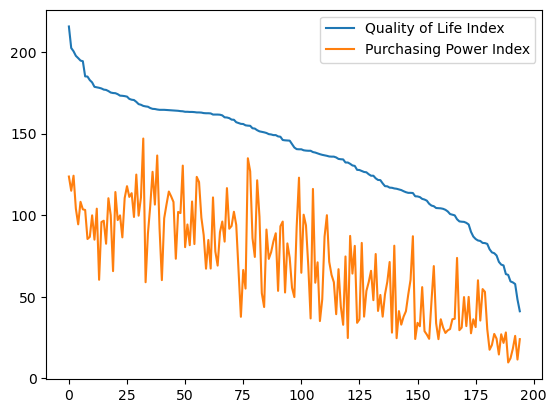

In [30]:
quality[["Quality of Life Index","Purchasing Power Index"]].plot()

<Axes: >

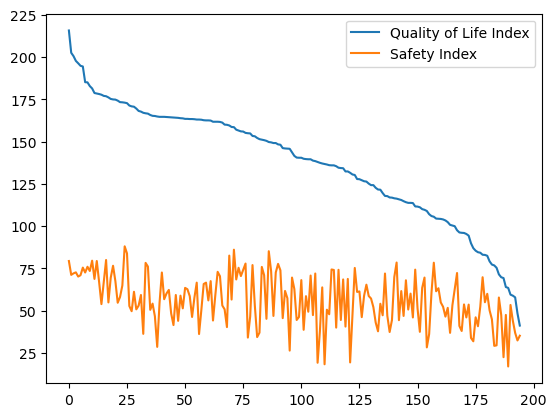

In [115]:
quality[["Quality of Life Index","Safety Index"]].plot()

<Axes: >

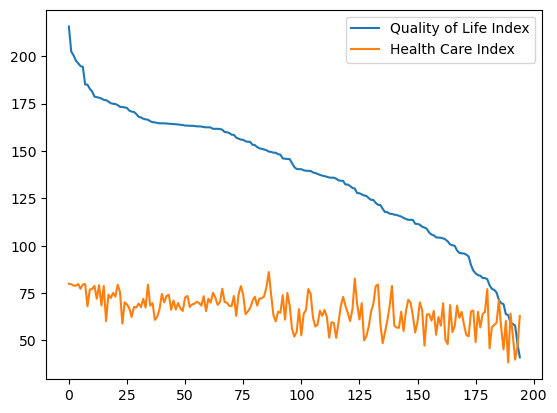

In [116]:
quality[["Quality of Life Index","Health Care Index"]].plot()

<Axes: >

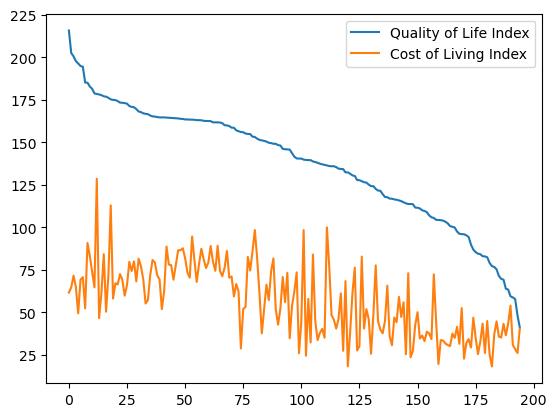

In [117]:
quality[["Quality of Life Index","Cost of Living Index"]].plot()

<Axes: >

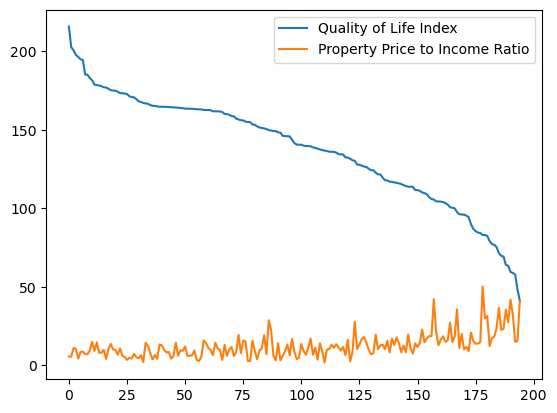

In [118]:
quality[["Quality of Life Index","Property Price to Income Ratio"]].plot()

In [31]:
x=quality["Quality of Life Index"]
print(x)
y=quality["Purchsing Power Index"]
print(y)

0      215.7
1      202.5
2      200.5
3      197.7
4      196.3
       ...  
190     59.4
191     58.8
192     57.8
193     48.3
194     41.1
Name: Quality of Life Index, Length: 195, dtype: float64


In [40]:
from sklearn import linear_model as lm
from sklearn.metrics import r2_score as rsq
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
x=quality["Quality of Life Index"]
print(x)
y=quality["Purchasing Power Index"]
print(y)
z=quality["Safety Index"]
print(z)
h=quality["Health Care Index"]
print(h)
q=quality["Cost of Living Index"]
print(q)
p=quality["Property Price to Income Ratio"]
print(p)
r=quality["Traffic Commute Time Index"]
print(r)
s=quality["Pollution Index"]
print(s)

0      215.7
1      202.5
2      200.5
3      197.7
4      196.3
       ...  
190     59.4
191     58.8
192     57.8
193     48.3
194     41.1
Name: Quality of Life Index, Length: 195, dtype: float64
0      123.7
1      115.0
2      124.2
3      104.0
4       94.4
       ...  
190     12.3
191     18.1
192     26.0
193     11.5
194     24.0
Name: Purchasing Power Index, Length: 195, dtype: float64
0      79.3
1      71.1
2      72.0
3      72.6
4      70.1
       ... 
190    53.3
191    44.0
192    36.8
193    32.3
194    35.1
Name: Safety Index, Length: 195, dtype: float64
0      79.9
1      79.7
2      79.0
3      78.9
4      79.8
       ... 
190    64.2
191    52.6
192    39.9
193    46.7
194    62.9
Name: Health Care Index, Length: 195, dtype: float64
0      61.6
1      64.7
2      71.6
3      65.0
4      49.4
       ... 
190    54.0
191    30.8
192    28.4
193    26.1
194    40.4
Name: Cost of Living Index, Length: 195, dtype: float64
0       5.6
1       5.5
2      11.0
3      10.

In [42]:
y=quality["Purchasing Power Index"]
print(y)

0      123.7
1      115.0
2      124.2
3      104.0
4       94.4
       ...  
190     12.3
191     18.1
192     26.0
193     11.5
194     24.0
Name: Purchasing Power Index, Length: 195, dtype: float64


In [43]:
y.corr(x)

0.7945532711748415

In [121]:
y.corr(z)

0.1482592097881384

In [122]:
y.corr(h)

0.5004784270512818

In [123]:
x.corr(z)

0.43634693719527085

In [133]:
x.corr(p)

-0.635319860253007

In [134]:
h.corr(s)

-0.5151067305441593

In [140]:
q.corr(x)

0.6503560554393664

<Axes: ylabel='Quality of Life Index'>

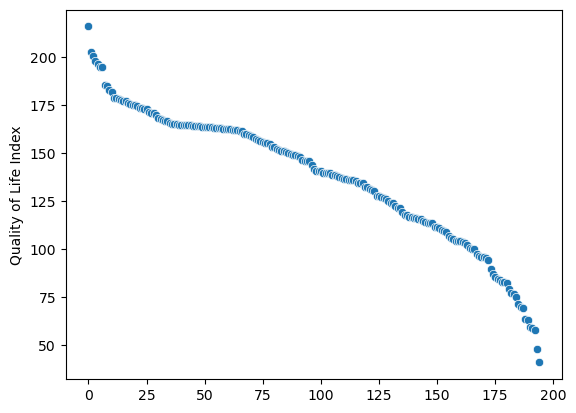

In [45]:
sns.scatterplot(x)

<Axes: ylabel='Purchasing Power Index'>

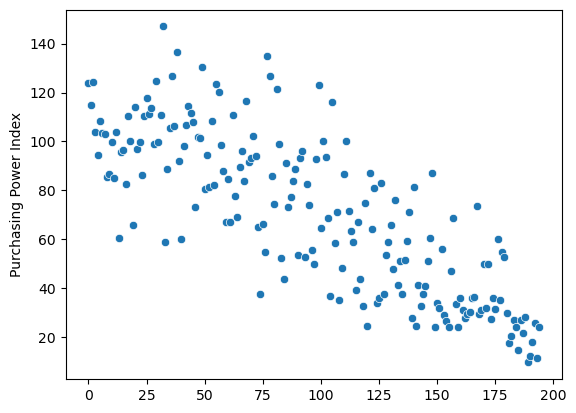

In [125]:
sns.scatterplot(y)

<Axes: ylabel='Safety Index'>

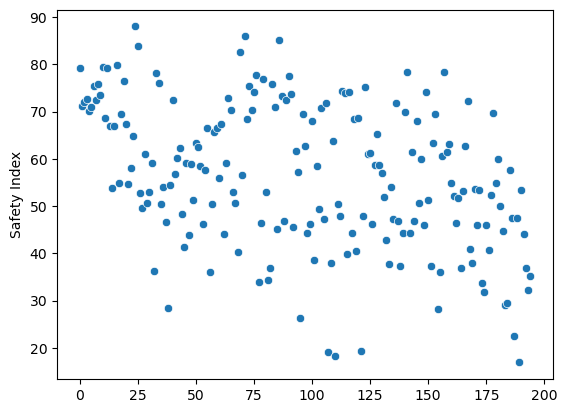

In [127]:
sns.scatterplot(z)

<Axes: ylabel='Cost of Living Index'>

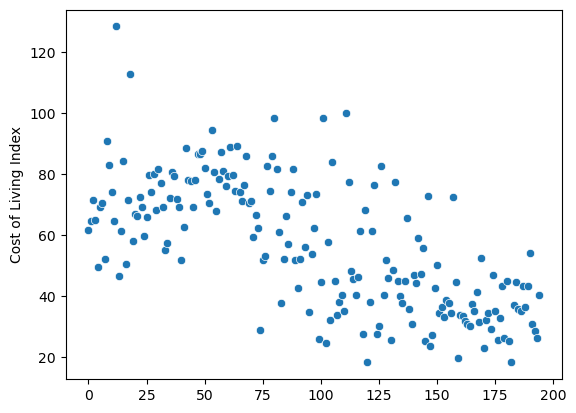

In [128]:
sns.scatterplot(q)

<Axes: ylabel='Health Care Index'>

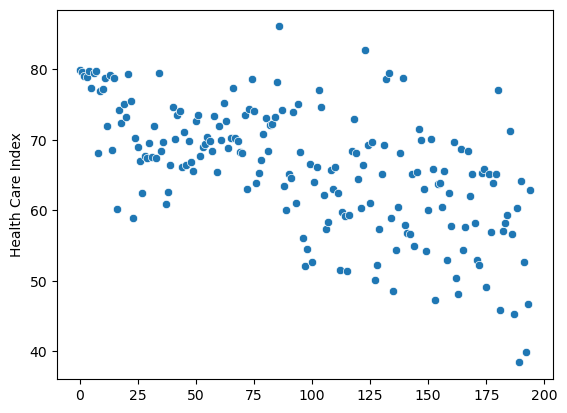

In [129]:
sns.scatterplot(h)